In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

In [3]:
hyspexdir = Path("/Volumes/FIREICE/fiboreal/cwaigl/2021-HySpex_fuels/HySpex_data_extracted/")
datafile = "spectra_fortraining.pkl.gz"

In [4]:
spectra = pd.read_pickle(hyspexdir / datafile)
spectra

,fid,species,event,flightline,vegclass,context,spectrum
0,0,black spruce,20210803-BC,03,Open Black Spruce Forest,crown,"[120.0, 100.0, 75.0, 109.0, 104.0, 106.0, 154...."
1,1,black spruce,20210803-BC,03,Open Black Spruce Forest,crown,"[31.0, 101.0, 89.0, 133.0, 109.0, 145.0, 151.0..."
2,2,black spruce,20210803-BC,03,Open Black Spruce Forest,crown,"[104.0, 78.0, 78.0, 111.0, 121.0, 94.0, 99.0, ..."
3,3,black spruce,20210803-BC,03,Open Black Spruce Forest,crown,"[70.0, 95.0, 108.0, 132.0, 125.0, 131.0, 172.0..."
4,4,understory,20210803-BC,03,Open Black Spruce Forest,semi-shade,"[55.0, 41.0, 64.0, 76.0, 102.0, 112.0, 139.0, ..."
...,...,...,...,...,...,...,...
855,788,water,20200830-BC,06,river,open,"[476.0, 385.0, 474.0, 456.0, 495.0, 419.0, 504..."
856,789,water,20200830-BC,06,river,open,"[525.0, 449.0, 502.0, 528.0, 451.0, 446.0, 534..."
857,790,water,20200830-BC,06,river,open,"[412.0, 387.0, 350.0, 430.0, 448.0, 448.0, 575..."
858,791,water,20200830-BC,06,river,open,"[403.0, 386.0, 380.0, 402.0, 456.0, 462.0, 508..."


In [173]:
data = spectra.loc[
    (spectra.event=='20200830-BC') & 
    (
        ((spectra.species == 'black spruce' ) & spectra.vegclass.isin(['Open Black Spruce Forest', 'Open Spruce/Tamarack Forest'])) |
        ( spectra.species == 'white spruce' ) |
        ((spectra.species == 'paper birch' ) & ( spectra.vegclass.isin(['Closed Paper Birch Forest', 'Closed Spruce/Paper Birch Forest', 'Open Spruce/Paper Birch Forest']) | spectra.vegclass.isnull())) |
        ((spectra.species == 'quaking aspen' ) & (spectra.context == 'crown')) 
    )
] 
data

,fid,species,event,flightline,vegclass,context,spectrum
260,48,white spruce,20200830-BC,04,Open White Spruce Forest,crown,"[63.0, 22.0, 42.0, 93.0, 98.0, 91.0, 106.0, 15..."
261,49,white spruce,20200830-BC,04,Open White Spruce Forest,crown,"[82.0, 20.0, 71.0, 40.0, 65.0, 42.0, 112.0, 12..."
262,50,white spruce,20200830-BC,04,Open White Spruce Forest,crown,"[46.0, 30.0, 59.0, 50.0, 31.0, 43.0, 63.0, 102..."
263,51,white spruce,20200830-BC,04,Open White Spruce Forest,crown,"[45.0, 57.0, 9.0, 15.0, 23.0, 50.0, 109.0, 106..."
264,52,white spruce,20200830-BC,04,Open White Spruce Forest,crown,"[61.0, 12.0, 0.0, 12.0, 42.0, 24.0, 94.0, 131...."
...,...,...,...,...,...,...,...
753,736,white spruce,20200830-BC,05,None,None,"[99.0, 53.0, 96.0, 103.0, 143.0, 128.0, 180.0,..."
754,737,white spruce,20200830-BC,05,None,None,"[78.0, 83.0, 74.0, 145.0, 100.0, 115.0, 191.0,..."
759,742,black spruce,20200830-BC,05,Open Spruce/Tamarack Forest,crown,"[131.0, 84.0, 68.0, 152.0, 163.0, 152.0, 123.0..."
760,743,black spruce,20200830-BC,05,Open Spruce/Tamarack Forest,crown,"[61.0, 103.0, 111.0, 107.0, 140.0, 135.0, 151...."


In [174]:
data.species.value_counts()

white spruce     78
quaking aspen    58
paper birch      33
black spruce     21
Name: species, dtype: int64

In [175]:
selected_band_idx = np.array([284,
 1,
 235,
 346,
 152,
 311,
 49,
 238,
 364,
 119,
 87,
 250,
 409,
 117,
 361,
 189,
 54,
 303,
 218,
 85,
 252,
 149,
 362,
 173,
 428,
 14,
 217,
 260,
 104,
 368,
 96,
 421,
 9,
 218,
 330,
 107,
 431,
 41,
 253,
 187,
 349,
 92,
 312,
 33,
 218,
 407,
 157,
 370,
 27,
 217])

In [176]:
selected_cols = [f'band_{str(ii).zfill(3)}' for ii in selected_band_idx[:-10] + 1]
selected_cols

['band_285',
 'band_002',
 'band_236',
 'band_347',
 'band_153',
 'band_312',
 'band_050',
 'band_239',
 'band_365',
 'band_120',
 'band_088',
 'band_251',
 'band_410',
 'band_118',
 'band_362',
 'band_190',
 'band_055',
 'band_304',
 'band_219',
 'band_086',
 'band_253',
 'band_150',
 'band_363',
 'band_174',
 'band_429',
 'band_015',
 'band_218',
 'band_261',
 'band_105',
 'band_369',
 'band_097',
 'band_422',
 'band_010',
 'band_219',
 'band_331',
 'band_108',
 'band_432',
 'band_042',
 'band_254',
 'band_188']

In [177]:
mlsamples = []

for idx, row in data.iterrows():
    newdic = {}
    newdic['label'] = row.species
    for bandlabel, ref in zip(selected_cols, row.spectrum[selected_band_idx[:-10] + 1]):
        newdic[bandlabel] = ref
    mlsamples.append(newdic)

sampleDF = pd.DataFrame.from_records(mlsamples)
sampleDF

,label,band_285,band_002,band_236,band_347,band_153,band_312,band_050,band_239,band_365,...,band_369,band_097,band_422,band_010,band_331,band_108,band_432,band_042,band_254,band_188
0,white spruce,495.0,42.0,1523.0,52.0,2659.0,560.0,408.0,1407.0,658.0,...,223.0,1350.0,235.0,155.0,205.0,2349.0,271.0,430.0,507.0,1854.0
1,white spruce,532.0,71.0,1653.0,53.0,2509.0,600.0,383.0,1537.0,867.0,...,252.0,1259.0,308.0,130.0,222.0,2123.0,346.0,382.0,533.0,2060.0
2,white spruce,460.0,59.0,1419.0,43.0,2599.0,510.0,356.0,1295.0,329.0,...,169.0,1287.0,130.0,124.0,203.0,2209.0,158.0,361.0,446.0,1774.0
3,white spruce,425.0,9.0,1416.0,38.0,2322.0,525.0,324.0,1318.0,0.0,...,128.0,1098.0,106.0,85.0,189.0,1900.0,274.0,334.0,460.0,1771.0
4,white spruce,395.0,0.0,1315.0,37.0,2372.0,486.0,304.0,1216.0,98.0,...,137.0,1148.0,119.0,118.0,174.0,2035.0,179.0,322.0,431.0,1643.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,white spruce,978.0,96.0,2611.0,128.0,2823.0,1131.0,484.0,2397.0,279.0,...,461.0,1486.0,296.0,191.0,438.0,2479.0,406.0,495.0,943.0,2962.0
186,white spruce,977.0,74.0,2607.0,128.0,2752.0,1130.0,453.0,2393.0,279.0,...,460.0,1393.0,296.0,180.0,438.0,2313.0,406.0,467.0,942.0,2957.0
187,black spruce,1364.0,68.0,3269.0,190.0,3143.0,1556.0,635.0,3105.0,528.0,...,547.0,1768.0,783.0,212.0,570.0,2791.0,442.0,579.0,1370.0,3438.0
188,black spruce,915.0,111.0,1920.0,167.0,2186.0,1027.0,412.0,1794.0,233.0,...,491.0,1143.0,340.0,178.0,406.0,1866.0,218.0,426.0,879.0,1861.0


In [ ]:
sb.catplot(x='band_285', y='band_002', hue='label', data=sampleDF)

In [161]:
import sklearn
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sklearn.metrics
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE, ADASYN

In [178]:
X = sampleDF.drop(labels=['label'], axis=1)
y = sampleDF.label

In [179]:
np.random.seed(42)

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_resampled, y_resampled = SMOTE(k_neighbors=3).fit_resample(X_train, y_train)
model = RandomForestClassifier(n_estimators=400, max_depth=15)
#model.fit(X_train, y_train)
model.fit(X_resampled, y_resampled)
y_predict = model.predict(X_test)

<AxesSubplot:>

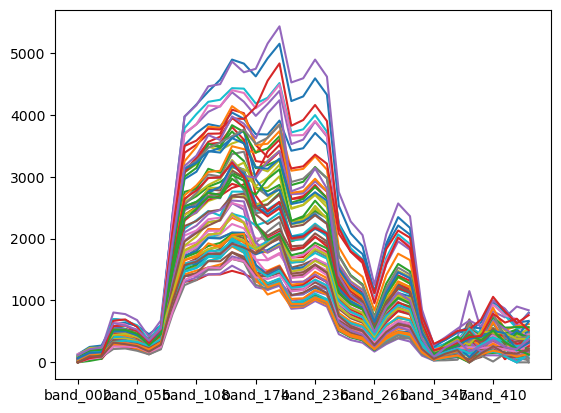

In [181]:
X_test.T.sort_index().plot(legend=False)

In [182]:
print(y_test, y_predict)

175      paper birch
180     white spruce
111    quaking aspen
65     quaking aspen
101     white spruce
           ...      
22      white spruce
115    quaking aspen
82       paper birch
181     white spruce
11      white spruce
Name: label, Length: 76, dtype: object ['paper birch' 'black spruce' 'quaking aspen' 'quaking aspen'
 'white spruce' 'black spruce' 'white spruce' 'white spruce'
 'quaking aspen' 'white spruce' 'white spruce' 'black spruce'
 'white spruce' 'quaking aspen' 'paper birch' 'white spruce'
 'black spruce' 'quaking aspen' 'paper birch' 'black spruce'
 'white spruce' 'white spruce' 'quaking aspen' 'black spruce'
 'white spruce' 'white spruce' 'black spruce' 'white spruce'
 'quaking aspen' 'paper birch' 'paper birch' 'white spruce' 'white spruce'
 'quaking aspen' 'paper birch' 'quaking aspen' 'paper birch'
 'quaking aspen' 'quaking aspen' 'white spruce' 'black spruce'
 'quaking aspen' 'paper birch' 'quaking aspen' 'black spruce'
 'white spruce' 'white spruce' 'white s

In [183]:
print(sklearn.metrics.f1_score(y_test,y_predict, average='micro'))
print(sklearn.metrics.classification_report(y_test,y_predict))

0.7105263157894737
               precision    recall  f1-score   support

 black spruce       0.38      0.75      0.50         8
  paper birch       0.75      0.90      0.82        10
quaking aspen       0.75      0.75      0.75        20
 white spruce       0.86      0.63      0.73        38

     accuracy                           0.71        76
    macro avg       0.68      0.76      0.70        76
 weighted avg       0.76      0.71      0.72        76



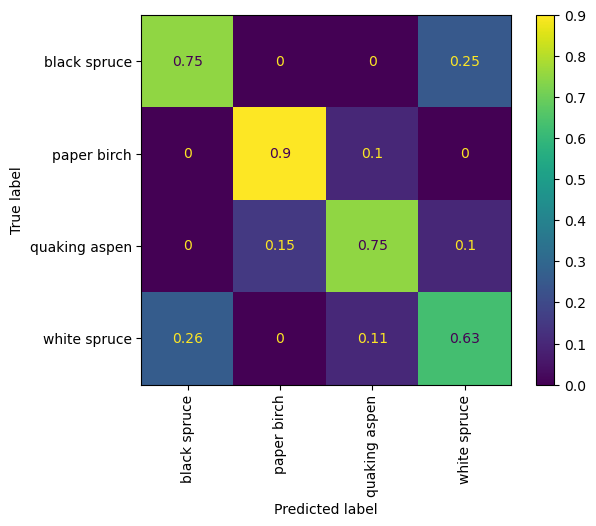

In [184]:
cm = confusion_matrix(y_test, y_predict, )
disp = ConfusionMatrixDisplay.from_predictions(y_test,y_predict, display_labels=sorted(y_test.unique()), xticks_rotation='vertical', normalize='true')


In [185]:
import joblib

In [186]:
joblib.dump(model, "singlepix_main_BCEF_2020.pkl") 

['singlepix_main_BCEF_2020.pkl']

Text(0.5, 1.0, 'Main canopy species, BCEF, 2020 & 2021')

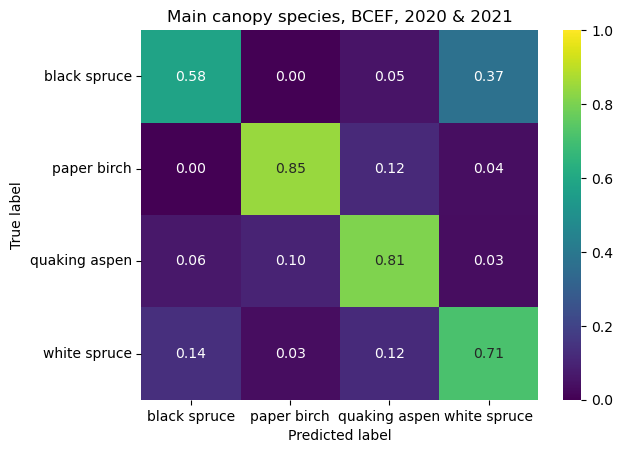

In [171]:
target_names=sorted(y_test.unique())
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots()
sb.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names, cmap='viridis', vmax=1.0)
plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.show(block=False)
plt.title("Main canopy species, BCEF, 2020 & 2021")

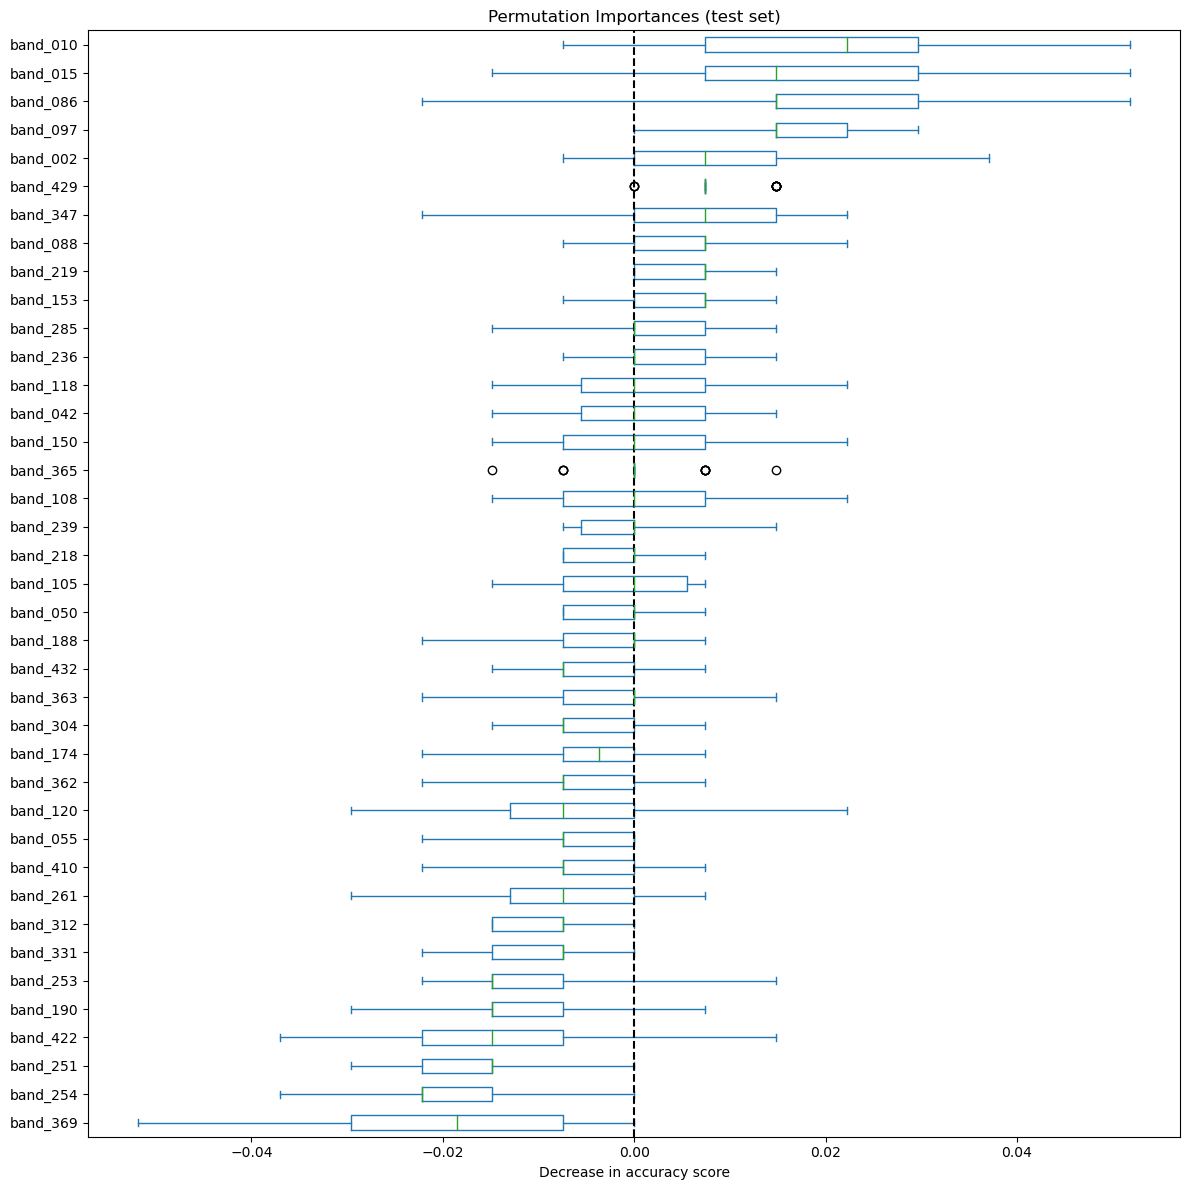

In [172]:
result = permutation_importance(
    model, X_test, y_test, n_repeats=30, random_state=41, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)

fig, ax = plt.subplots(figsize=(12, 12))
importances.plot.box(vert=False, whis=10, ax=ax)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()


In [ ]:
importances.columns[::-1][:10]

Index(['band_002', 'band_188', 'band_363', 'band_362', 'band_086', 'band_347',
       'band_422', 'band_120', 'band_010', 'band_331'],
      dtype='object')

In [ ]:
importantDS = sampleDF[['label'] + ['band_002', 'band_188', 'band_363', 'band_086', 
       'band_118', 'band_015', 'band_331']]
importantDS

,label,band_002,band_188,band_363,band_086,band_118,band_015,band_331
0,black spruce,75.0,2472.0,333.0,320.0,3041.0,203.0,423.0
1,black spruce,89.0,2342.0,303.0,276.0,2453.0,195.0,358.0
2,black spruce,78.0,2265.0,315.0,274.0,2311.0,182.0,334.0
3,black spruce,108.0,1910.0,205.0,266.0,2181.0,231.0,263.0
4,black spruce,127.0,2839.0,289.0,321.0,2858.0,228.0,420.0
...,...,...,...,...,...,...,...,...
142,black spruce,219.0,3371.0,453.0,426.0,4142.0,372.0,554.0
143,black spruce,169.0,2764.0,581.0,401.0,3191.0,301.0,592.0
144,black spruce,141.0,2864.0,474.0,344.0,3079.0,264.0,537.0
145,black spruce,241.0,3413.0,604.0,402.0,3537.0,339.0,569.0


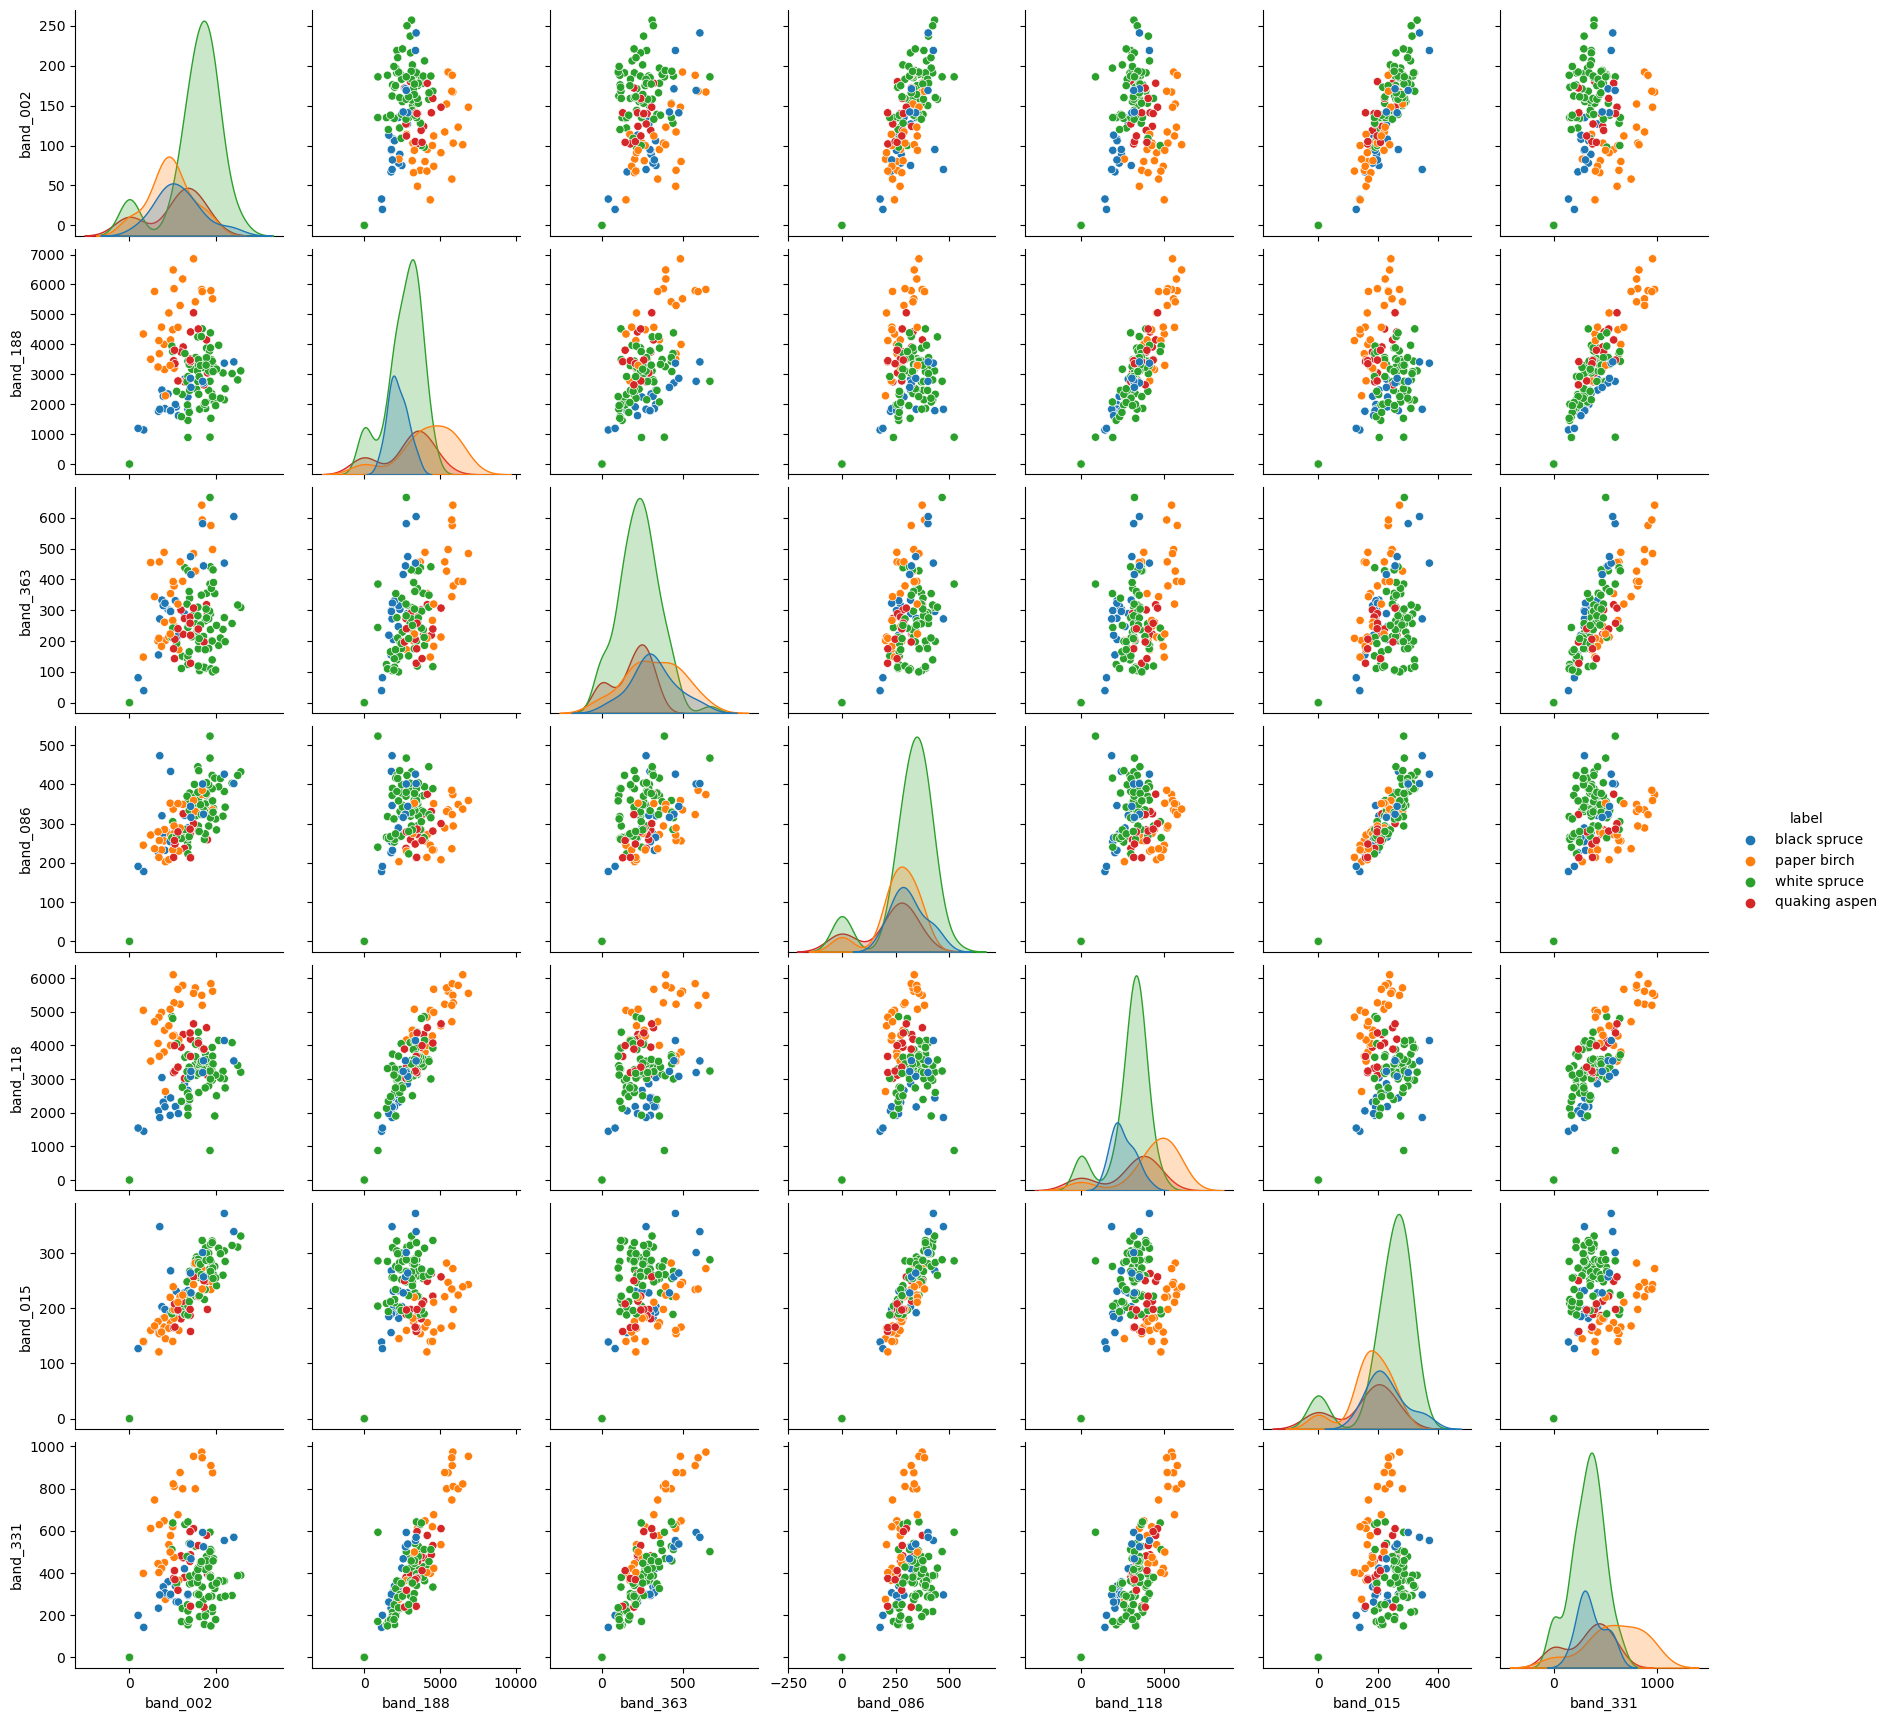

In [ ]:
sb.pairplot(hue='label', data=importantDS)

<AxesSubplot:>

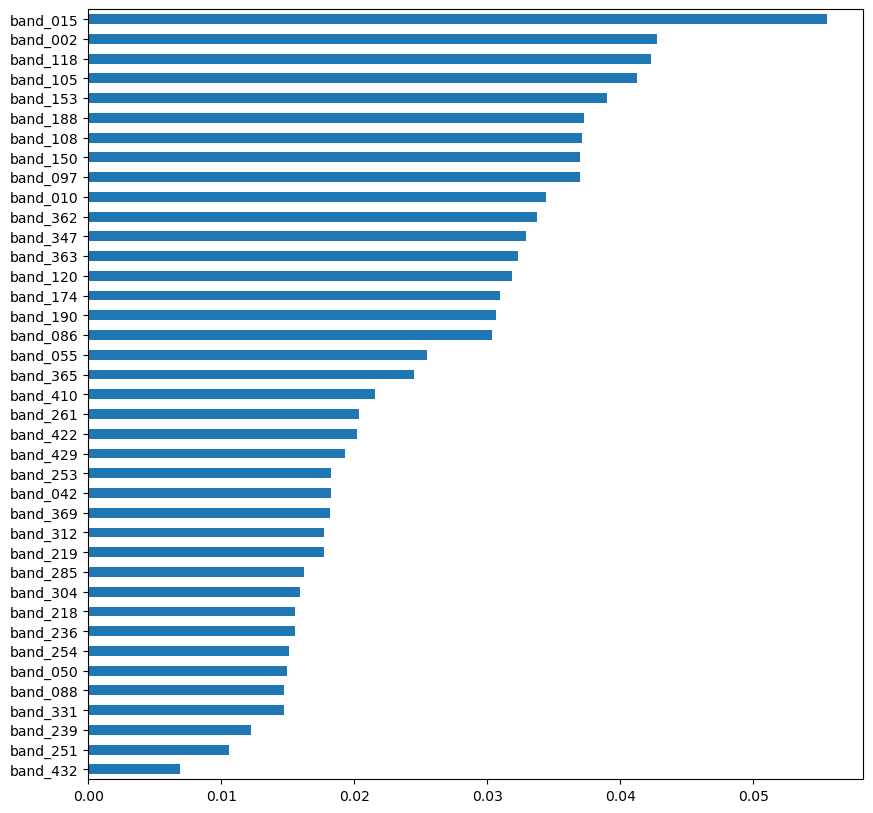

In [ ]:

mdi_importances = pd.Series(
    model.feature_importances_, index=model.feature_names_in_
).sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(10, 10))
mdi_importances.plot.barh(ax=ax)

In [ ]:
mdi_importances.index[::-1][:10]

Index(['band_015', 'band_002', 'band_118', 'band_105', 'band_153', 'band_188',
       'band_108', 'band_150', 'band_097', 'band_010'],
      dtype='object')

In [ ]:
mdi_importantDS = sampleDF[['label'] + list(mdi_importances.index[::-1][:10]) ]
mdi_importantDS

,label,band_015,band_002,band_118,band_105,band_153,band_188,band_108,band_150,band_097,band_010
0,black spruce,203.0,75.0,3041.0,2854.0,3210.0,2472.0,2866.0,3228.0,1705.0,185.0
1,black spruce,195.0,89.0,2453.0,2171.0,2573.0,2342.0,2248.0,2576.0,1385.0,158.0
2,black spruce,182.0,78.0,2311.0,2067.0,2368.0,2265.0,2179.0,2482.0,1351.0,142.0
3,black spruce,231.0,108.0,2181.0,2026.0,2195.0,1910.0,2074.0,2305.0,1273.0,181.0
4,black spruce,228.0,127.0,2858.0,2611.0,2920.0,2839.0,2736.0,3049.0,1641.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...
142,black spruce,372.0,219.0,4142.0,3633.0,4066.0,3371.0,3754.0,4380.0,2287.0,325.0
143,black spruce,301.0,169.0,3191.0,2903.0,3418.0,2764.0,3007.0,3463.0,1879.0,316.0
144,black spruce,264.0,141.0,3079.0,2797.0,3243.0,2864.0,2938.0,3311.0,1799.0,284.0
145,black spruce,339.0,241.0,3537.0,3236.0,3669.0,3413.0,3388.0,3900.0,2026.0,331.0


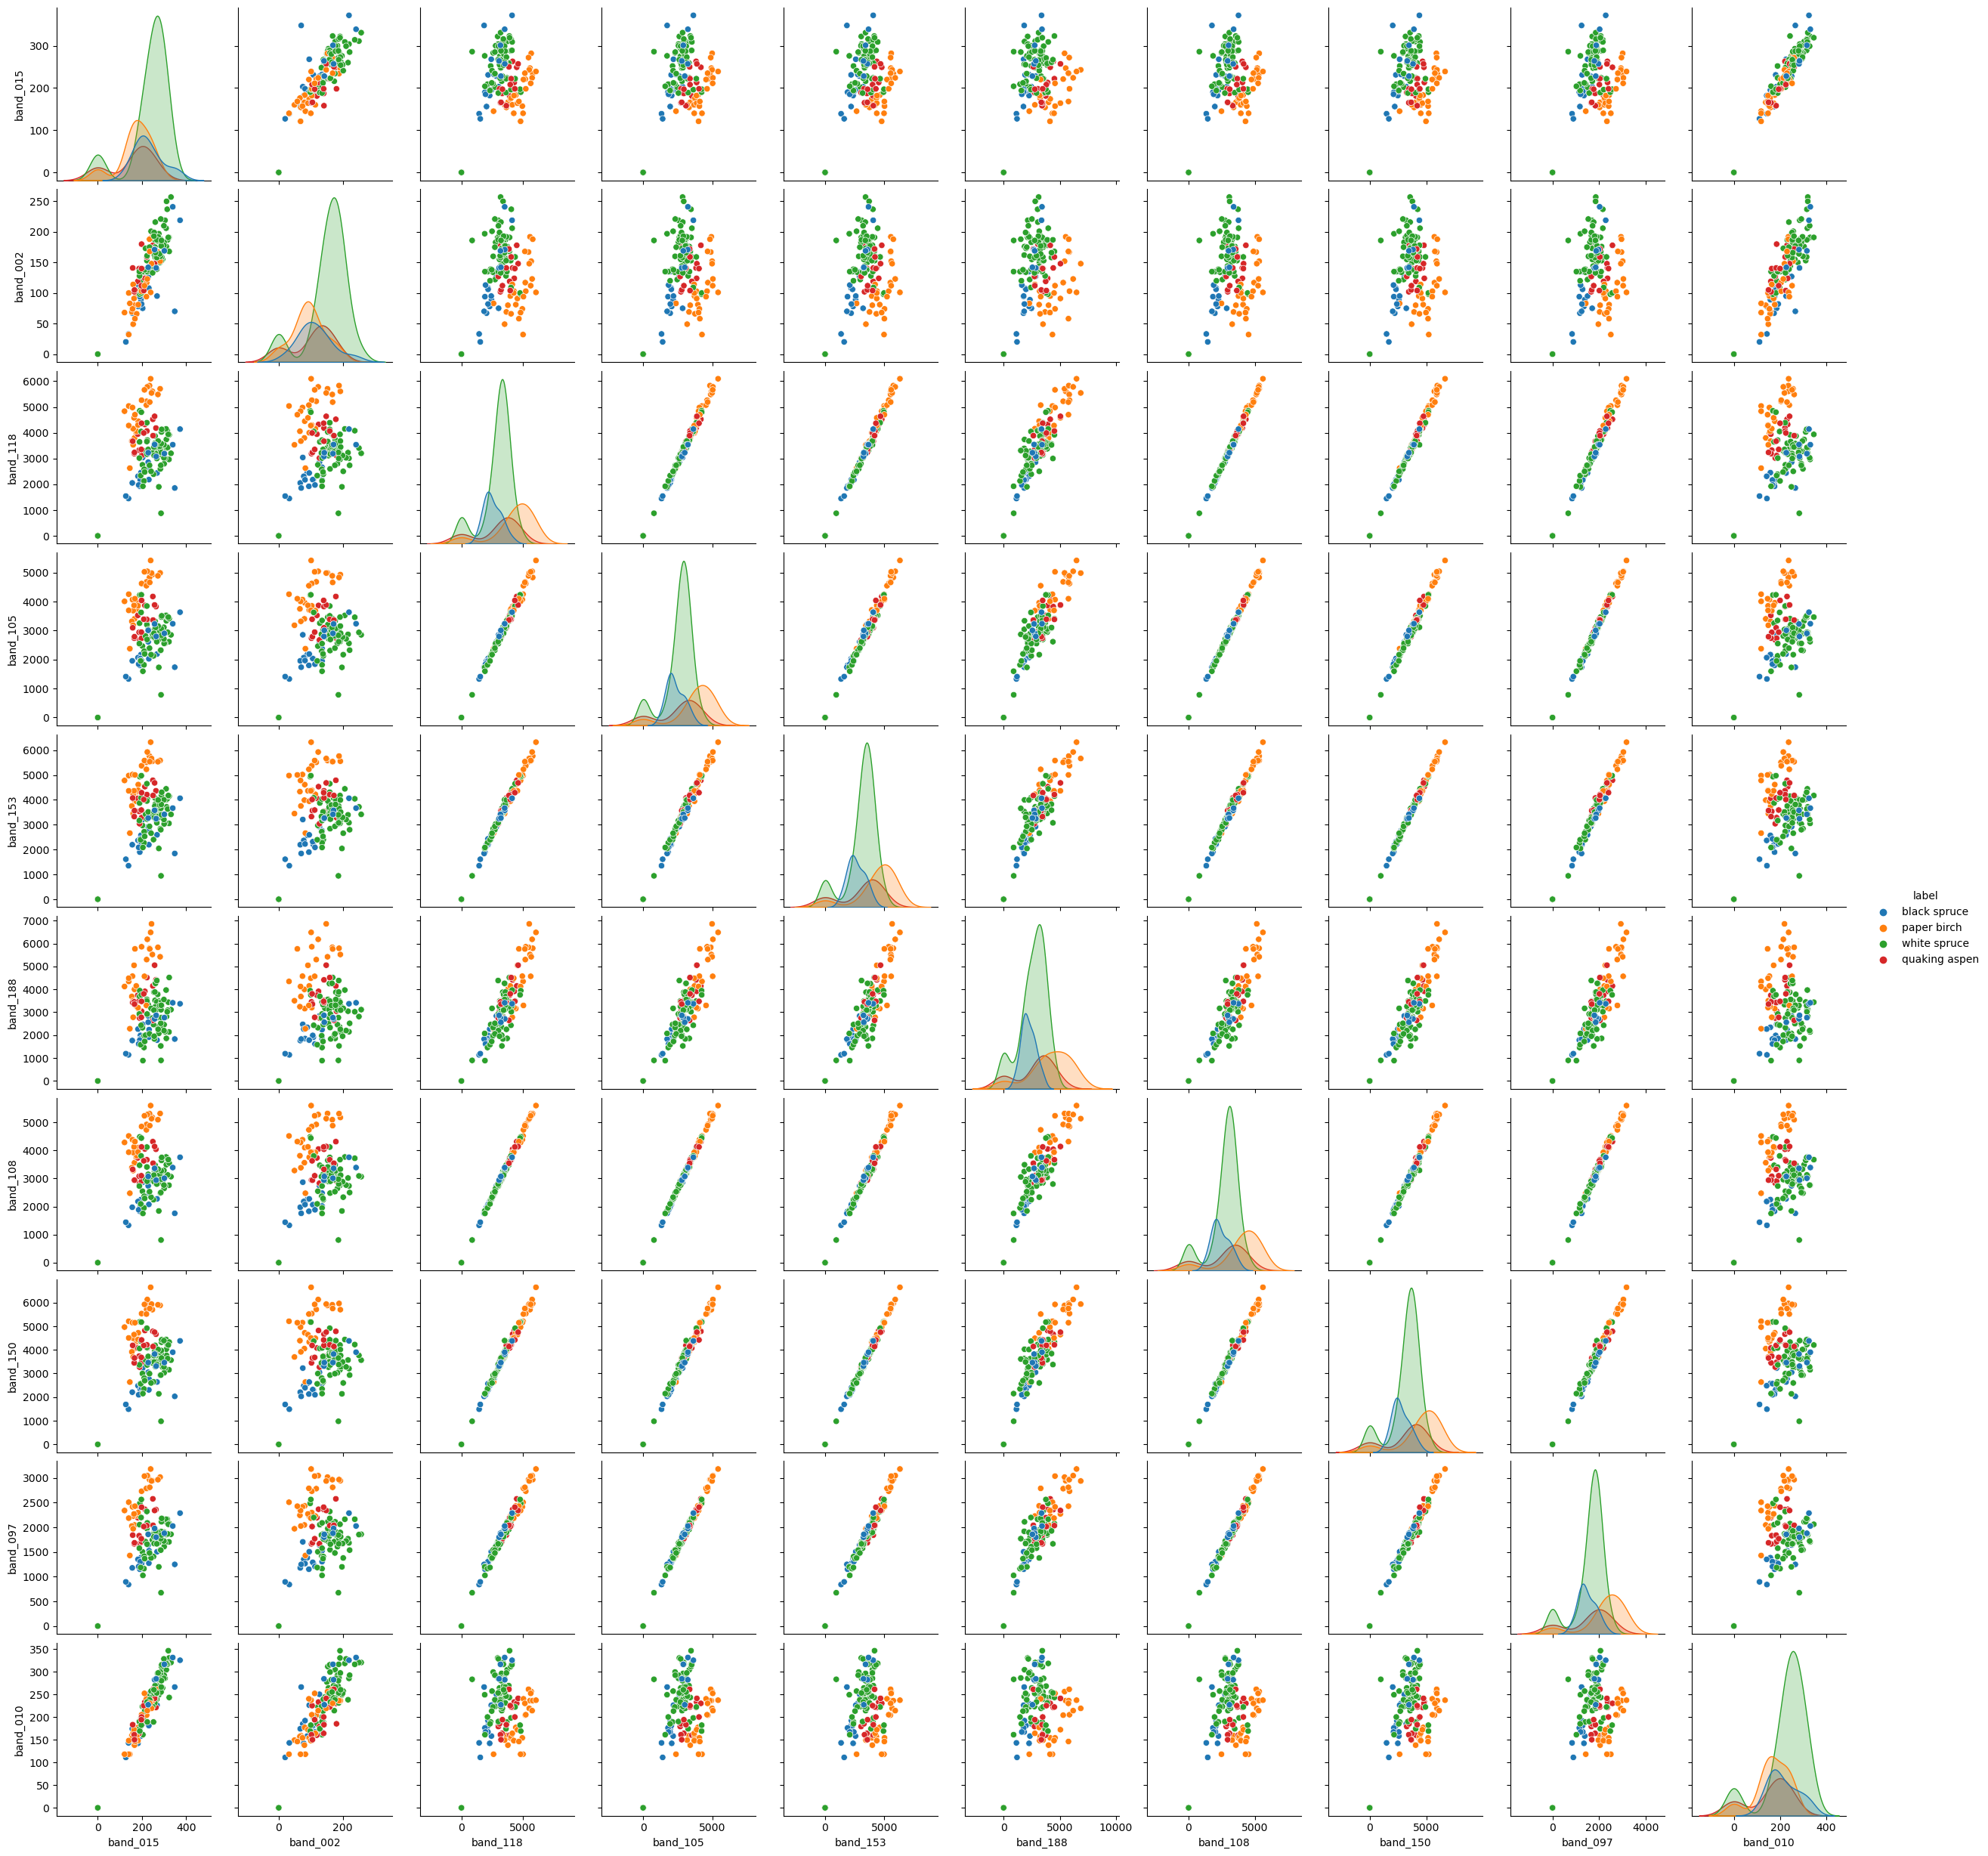

In [ ]:
sb.pairplot(hue='label', data=mdi_importantDS)

In [ ]:
model.feature_names_in_

array(['band_285', 'band_002', 'band_236', 'band_347', 'band_153',
       'band_312', 'band_050', 'band_239', 'band_365', 'band_120',
       'band_088', 'band_251', 'band_410', 'band_118', 'band_362',
       'band_190', 'band_055', 'band_304', 'band_219', 'band_086',
       'band_253', 'band_150', 'band_363', 'band_174', 'band_429',
       'band_015', 'band_218', 'band_261', 'band_105', 'band_369',
       'band_097', 'band_422', 'band_010', 'band_331', 'band_108',
       'band_432', 'band_042', 'band_254', 'band_188', 'band_350',
       'band_093', 'band_313', 'band_034', 'band_408', 'band_158',
       'band_371', 'band_028'], dtype=object)

In [ ]:
X_std = pd.DataFrame(StandardScaler().fit_transform(X.values), columns=X.columns, index=X.index)   
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42)
X_resampled, y_resampled = SMOTE(k_neighbors=3).fit_resample(X_train, y_train)
model = RandomForestClassifier(n_estimators=300, max_depth=15)
#model.fit(X_train, y_train)
model.fit(X_resampled, y_resampled)
y_predict = model.predict(X_test)

<AxesSubplot:>

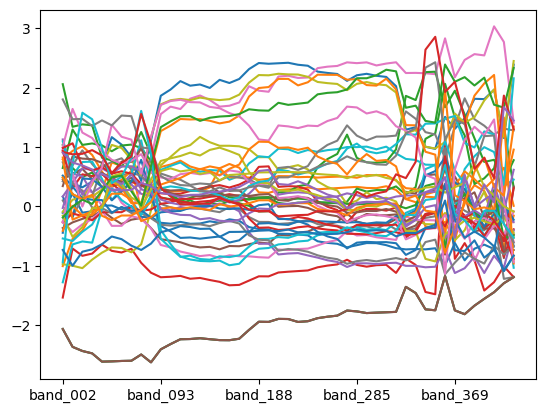

In [ ]:
X_test.T.sort_index().plot(legend=False)


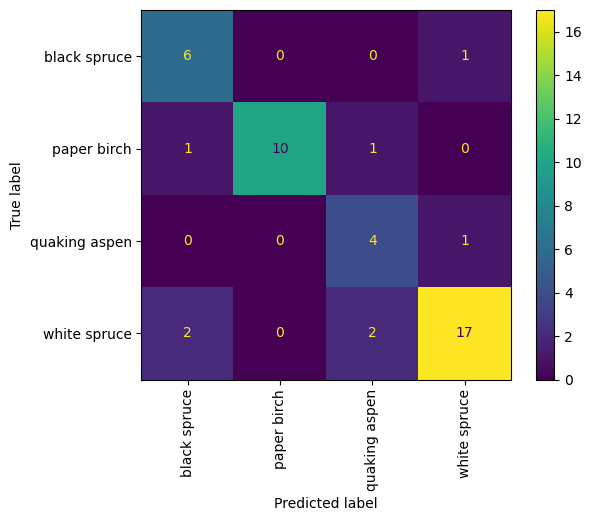

In [ ]:
cm = confusion_matrix(y_test, y_predict, )
disp = ConfusionMatrixDisplay.from_predictions(y_test,y_predict, display_labels=sorted(y_test.unique()), xticks_rotation='vertical')


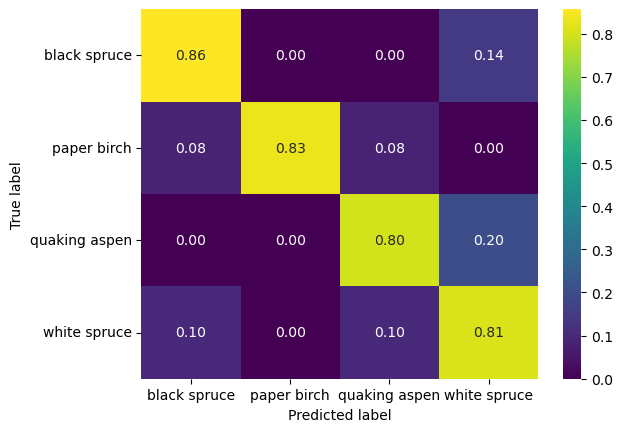

In [ ]:
target_names=sorted(y_test.unique())
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots()
sb.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names, cmap="viridis")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show(block=False)

In [ ]:
print(sklearn.metrics.precision_score(y_test,y_predict, average='micro'))
print(sklearn.metrics.recall_score(y_test,y_predict, average='micro'))
print(sklearn.metrics.f1_score(y_test,y_predict, average='micro'))
print(sklearn.metrics.classification_report(y_test,y_predict))



0.8222222222222222
0.8222222222222222
0.8222222222222222
               precision    recall  f1-score   support

 black spruce       0.67      0.86      0.75         7
  paper birch       1.00      0.83      0.91        12
quaking aspen       0.57      0.80      0.67         5
 white spruce       0.89      0.81      0.85        21

     accuracy                           0.82        45
    macro avg       0.78      0.82      0.79        45
 weighted avg       0.85      0.82      0.83        45



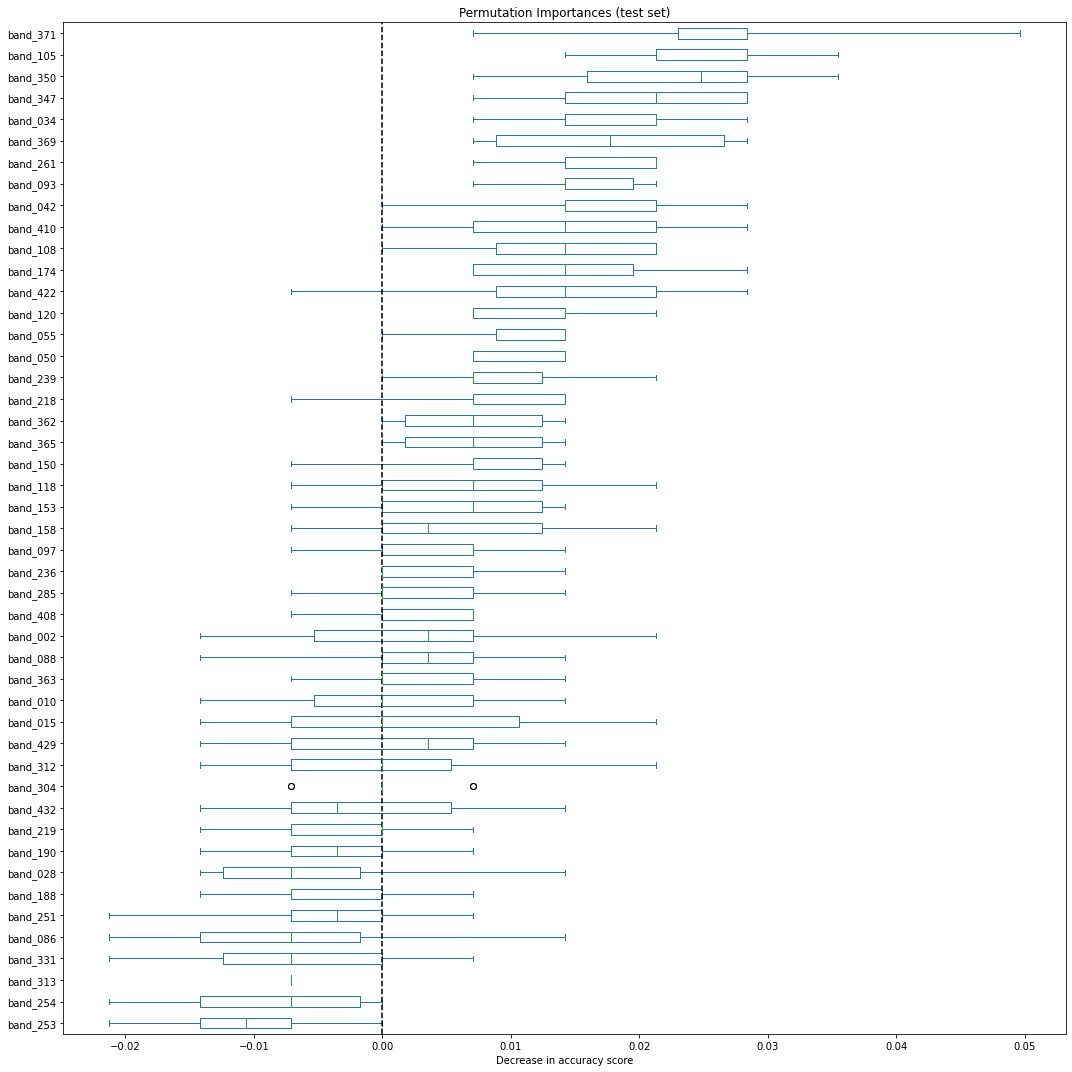

In [ ]:
result = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)

fig, ax = plt.subplots(figsize=(15, 15))
importances.plot.box(vert=False, whis=10, ax=ax)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()